# Exercises 09

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import curve_fit #non so se queste ultime due servono
from mpl_toolkits import mplot3d
from matplotlib import cm
import math

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep

## Exercise 09.1 - The Traveling Salesman Problem

The aim of this simulation was to find the shortest path that connected every city, passing through each one only once.

The algorithm used to solve the problem is a genetic algorithm, which means that we consider a population of N individuals each with a genetic code that in this case represent the order in which each city is chosen. Then we calculate for each one the total lenght of the path and using this information we choose the "fittest". The fitter an individual is the better chances has it to reproduce, which in this case means that they get to swap part of their path with another individual. This works because a short path probably means that some city are in best order possible, but probably not all of them. Thefore if the sons have a better fit than the parents the crossover worked well, otherwise they likely won't be chosen as parents for the next generation. 

We also introduced some kind of mutation on the sons, which in our case could me swapping two random city in the path or to reverse the order of a certain number of city.

### <span style="color:green"> 34 Cities randomly generated on a circle </span>

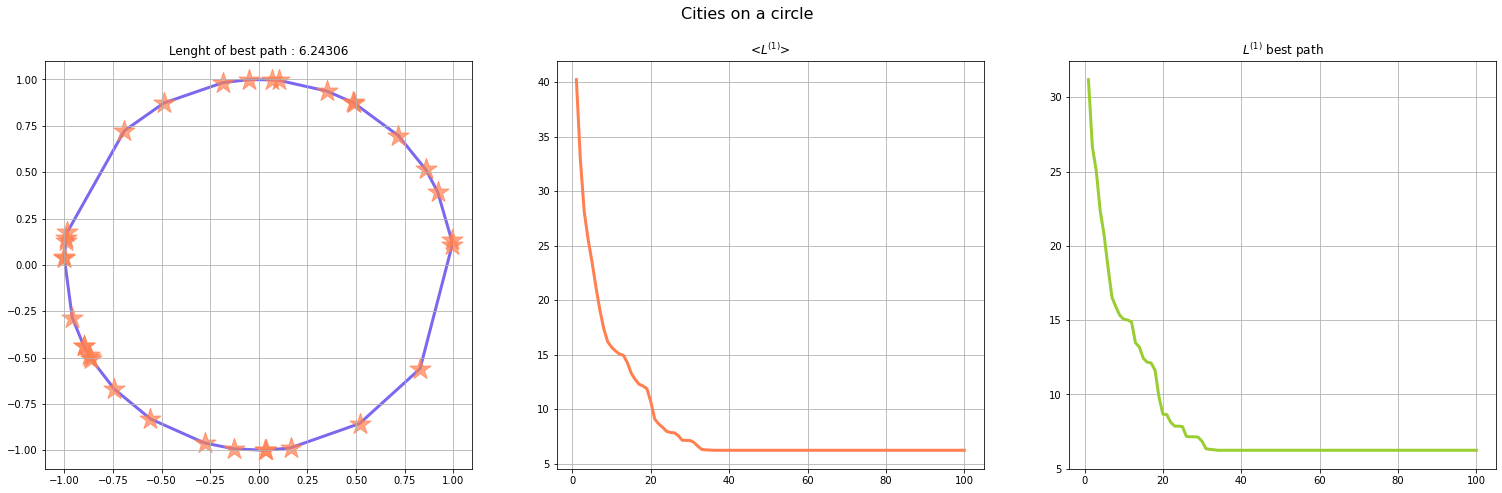

In [15]:
path = "Circle.dat"
a,x, y = np.loadtxt(path, usecols=(0, 1, 2), unpack='true')
path = "Circle/final.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)

fig, (ax1, ax2, ax3)=plt.subplots(1,3,  figsize=(26, 7.5))

fig.suptitle("Cities on a circle", size =16)

ax1.plot(x1,y1, c="mediumslateblue", linewidth=3, zorder=-1)
ax1.scatter(x,y, c="coral", s=500, marker="*", zorder=1, alpha=0.7)
ax1.grid()
ax1.set_title("Lenght of best path : " + str(L))

path = "Circle/ave_path.out"
x, y = np.loadtxt(path, usecols=(0, 1), unpack='true')

ax2.plot(x,y, c="coral", linewidth=3)
ax2.grid()
ax2.set_title("<$L^{(1)}$>")

path = "Circle/best.out"
x, y = np.loadtxt(path, usecols=(0, 1), unpack='true')

ax3.plot(x,y, c="yellowgreen", linewidth=3)
ax3.grid()
ax3.set_title("$L^{(1)}$ best path")


plt.show()

This first example was done more to test if the algorithm we wrote was working well, because it is really easy to see if the path really is the best path on a circumference: the total leght should be slightly less than the circumference - in our case slighty less than $2\pi (6.28)$. With randomly distributed points is not so easy because even if there is no line crossing another it is not easy to check if it really is the shortest path.

<span style="color:orange"> <b>Re-running the following code will start a brief animation  that shows how the shortest path changes in time</b>. </span>

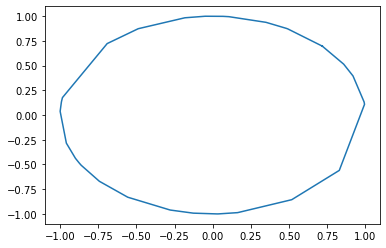

In [4]:
plt.figure()

for i in range(31):
    path = "Circle/path"+str(i)+".out"
    x,y=np.loadtxt(path, usecols=(1, 2), unpack='true', skiprows=1)
    plt.plot(x,y)
    plt.show()
    sleep(0.1)
    clear_output(wait=True)
    
plt.show()

### <span style="color:green"> 34 Cities randomly generated on a square </span>

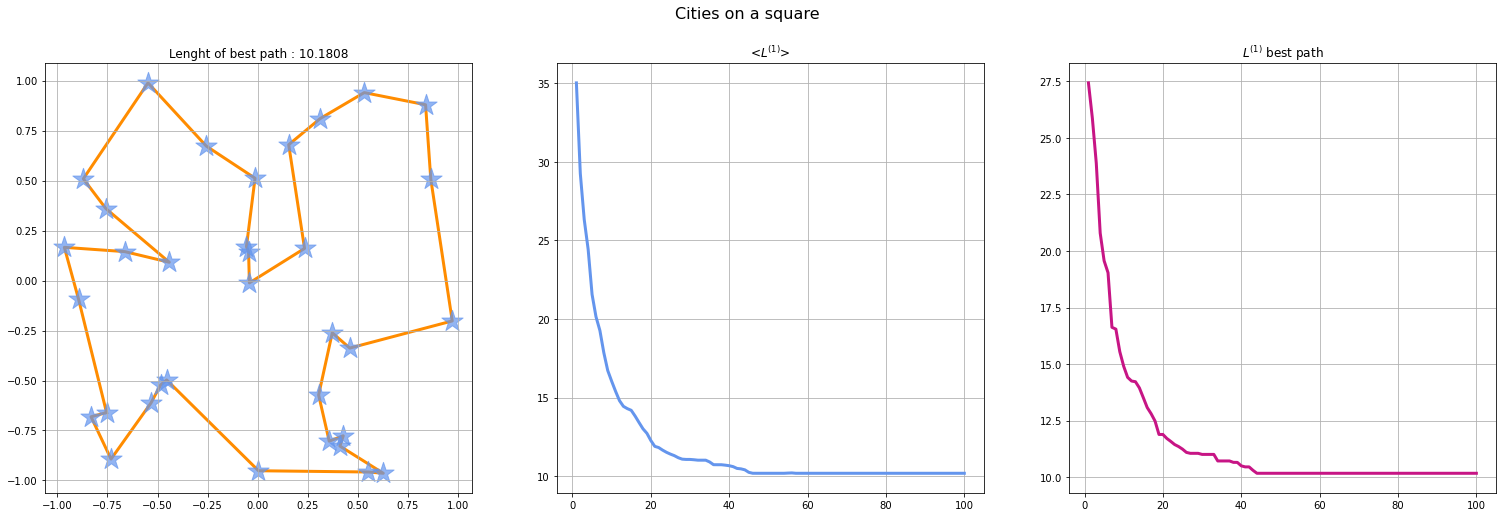

In [16]:
path = "Square.dat"
a,x, y = np.loadtxt(path, usecols=(0, 1, 2), unpack='true')
path = "Square/final.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)

fig, (ax1, ax2, ax3)=plt.subplots(1,3,  figsize=(26, 7.9))

fig.suptitle("Cities on a square", size =16)

ax1.plot(x1,y1, c="darkorange", linewidth=3, zorder=-1)
ax1.scatter(x,y, c="cornflowerblue", s=500, marker="*", zorder=1, alpha=0.7)
ax1.grid()
ax1.set_title("Lenght of best path : " + str(L))

path = "Square/ave_path.out"
x, y = np.loadtxt(path, usecols=(0, 1), unpack='true')

ax2.plot(x,y, c="cornflowerblue", linewidth=3)
ax2.grid()
ax2.set_title("<$L^{(1)}$>")

path = "Square/best.out"
x, y = np.loadtxt(path, usecols=(0, 1), unpack='true')

ax3.plot(x,y, c="mediumvioletred", linewidth=3)
ax3.grid()
ax3.set_title("$L^{(1)}$ best path")


plt.show()

In this case as in the other we can see that both the graph that shows the total lenght of the path of the pest half and the graph that shows the lenght of only the best path converge to the shortest path in aproximately 50 generations.

Also as expected it takes more generation in this case to reach the shortest path: the problem in indeed more complicated.

<span style="color:orange"> <b>Re-running the following code will start a brief animation  that shows how the shortest path changes in time</b>. </span>

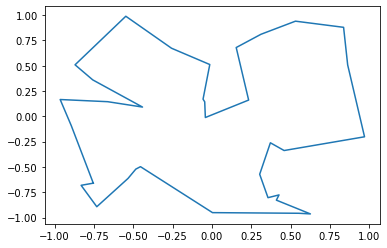

In [6]:
plt.figure()

for i in range(33):
    path = "Square/path"+str(i)+".out"
    x,y=np.loadtxt(path, usecols=(1, 2), unpack='true', skiprows=1)
    plt.plot(x,y)
    plt.show()
    sleep(0.1)
    clear_output(wait=True)
    
plt.show()